# Exercice sur les métriques

Pour l'exercice on va réutiliser le jeu de données sur le diabète.

Rappel concernant la target "diabete" : 
- 0 représente une personne n'ayant pas le diabète
- 1 représente une personne ayant le diabète

Dans le bout de code ci-dessous, on importe deux modèles différents que l'on entraîne sur le dataset.
Les différents imports nécessaires pour l'exercice sont également déjà fait. Ceux dont vous aurez besoin sont importés de `numpy`, `sklearn.metrics` et `sklearn.model_selection`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict

data = pd.read_csv("dataset/pima-indians-diabetes.data.csv", header=None, names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age", "diabete"])

columns = ["blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age"]
imputer = KNNImputer(missing_values=0, n_neighbors=5)
columns_imputed = imputer.fit_transform(data[columns])
data[columns] = columns_imputed

X = data.drop("diabete", axis=1)
y = data.diabete

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.80, random_state=42, stratify=y)

tr_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), DecisionTreeClassifier(random_state=42))
tr_clf.fit(X_train, y_train)

rf_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Exercice :

A partir de l'étape 2, les différentes tâches devront être effectuées pour les deux modèles `sgd_clf` et `rf_clf`.

#### 1. Analyser la répartition de la target

In [3]:
# Utiliser le dataframe data ou y
y.value_counts()

diabete
0    500
1    268
Name: count, dtype: int64

Qu'est ce qu'on peut dire sur la répartition ?

Votre réponse

c'est déséquilibré en faveur des 0

### 2. Réaliser les prédictions sur le training set

In [6]:
from sklearn.model_selection import cross_val_predict

rf_predict = cross_val_predict(rf_clf, X_test, y_test)
print(rf_predict)
tr_predict = cross_val_predict(tr_clf, X_test, y_test)
print(tr_predict)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 0 0 1 0 0]


 ### 3. Réaliser la matrice de confusion

Text(0.5, 1.0, 'TR')

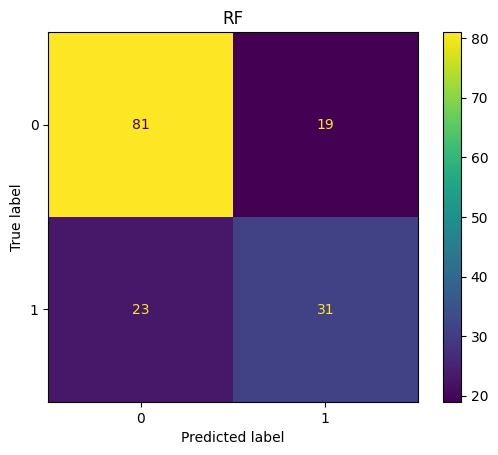

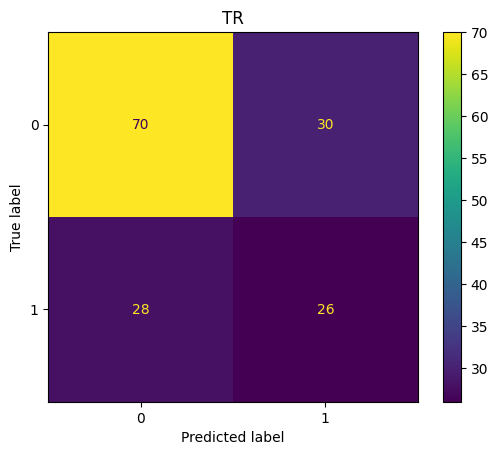

In [13]:
# Utiliser les prédictions réalisées juste avant
# Pour une meilleur visualisation, représenter la matrice avec un dataframe ou la fonction display pour la matrice
# Pour le dataframe ajouter le nom aux index et colonnes peut aider à une meilleur compréhension
# Pour la fonction display ajouter les labels

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_predict)).plot()
plt.title('RF')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, tr_predict)).plot()
plt.title('TR')

Que remarquez-vous sur ces matrices ? Est-ce qu'un modèle fait un type d'erreur particulier ? 

Votre réponse

### 4. Calculer les différentes métriques

In [15]:
# Calculer les métriques une par une ou utiliser la fonction pour calculer l'ensemble des métriques
# Rappel des métriques : accuracy, recall, precision, F1 score

from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

print('RF')
print(classification_report(y_test, rf_predict))
print('\nTR')
print(classification_report(y_test, tr_predict))

RF
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154


TR
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       100
           1       0.46      0.48      0.47        54

    accuracy                           0.62       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.63      0.62      0.62       154



Qu'est ce qu'on peut dire sur ces différentes métriques ? Est-ce qu'un modèle est meilleur que l'autre ? Comment interprétez-vous la différence de score de precision entre les deux modèles ? 

Votre réponse

### 5. Calculer les probabilités

In [16]:
# Utiliser la même fonction que pour les prédictions en ajoutant un paramètre afin d'obtenir les probabilités
# A partir de ces probabilités récupérer uniquement celles pour la classe positive

from sklearn.model_selection import cross_val_predict

tr_proba = cross_val_predict(tr_clf, X_test, y_test, method='predict_proba')
print('TR')
print(tr_proba)
rf_proba = cross_val_predict(rf_clf, X_test, y_test, method='predict_proba')
print('\nRF')
print(rf_proba)

TR
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.

### 6. Calculer les combinaisons de precision et recall

In [38]:
# Utiliser les probabilités calculés précedemment

from sklearn.metrics import precision_recall_curve
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(y_test, tr_proba[:,-1])

### 7. Représenter graphiquement l'évolution de la precision et du recall en fonction du seuil

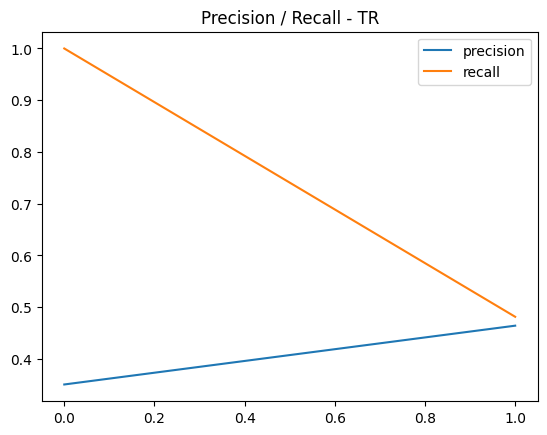

In [42]:
# Utiliser les thresholds, precisions et recall calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(thresholds_tr, precisions_tr[:-1], label='precision')
plt.plot(thresholds_tr, recalls_tr[:-1], label='recall')

plt.title('Precision / Recall - TR')
plt.legend()
plt.show()

Dans le cas du diagnostic du diabète, est-ce qu'on préfére maximiser le recall ou la precision ?

Votre réponse

Le réel -> recall

### 8. Représenter graphiquement l'évolution de la precision en fonction du recall et calculer l'AUC pour cette courbe

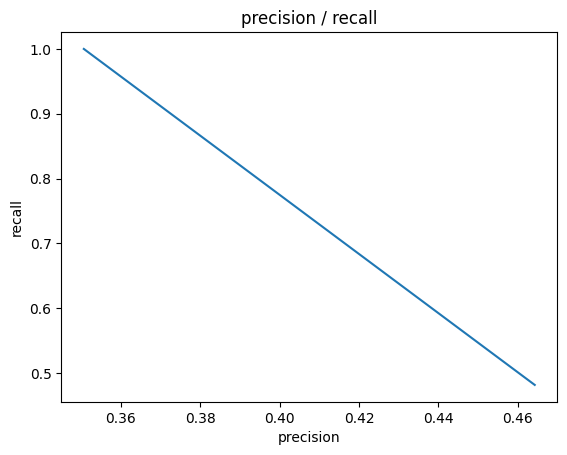

0.40536315536315537


In [47]:
# Utiliser les precisions et recalls calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

from sklearn.metrics import average_precision_score

plt.plot(precisions_tr[:-1], recalls_tr[:-1])
plt.title('precision / recall')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

auc_pr = average_precision_score(y_test, tr_proba[:,-1])
print(auc_pr)

D'après l'AUC pour la courbe precision/recall, quel modèle est le meilleur ? 

Votre réponse

### 9. Calculer le seuil pour obtenir un score de recall de 0.9

In [9]:
# Utiliser les thresholds calculés précedemment
# Obtenir l'index pour un recall de 0.9 puis récupérer le seuil à partir de cette index

import numpy as np

### 10. A partir des seuils calculés, créer de nouvelles prédictions

In [10]:
# Utiliser les scores obtenus à l'étape 5 et les seuils calculés


### 11. Afficher les métriques avec classification report pour ces nouvelles prédictions

Qu'est ce que vous constatez concernant le recall pour le modèle Random Forest ? Quel est l'impact d'avoir changer le seuil pour augmenter le recall ?

Votre réponse

### 12. Créer une matrice de confusion en utilisant ces nouvelles prédictions

Qu'est ce qu'on peut dire sur la matrice de confusion pour le modèle Random Forest ? 

Votre réponse

### 13. Réaliser la courbe ROC

In [12]:
# Vous pouvez utiliser cette fonction pour créer le graphique de la courbe ROC

def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

In [11]:
# Utiliser les scores obtenus à l'étape 5
# Représenter les deux modèles sur le même graphique

from sklearn.metrics import roc_curve

Comment analysez-vous ce graphique ?

Votre réponse

### 14. Calculer l'AUC

In [13]:
# Utiliser les scores obtenus à l'étape 5

from sklearn.metrics import roc_auc_score

Qu'est ce qu'on peut dire sur ces scores AUC ?

Votre réponse